# Exploratory Data Analysis (EDA)

Given the nature of the KDD Cup 1999 dataset, which is focused on network intrusion detection, here's a list of potential EDA tasks:

### List of EDA:

1. **Distribution of Attack Types**: Visualize the distribution of different attack types in the dataset. This will give an overview of the most common and rare attacks.

2. **Basic Statistics**: For numerical features, compute and visualize basic statistics like mean, median, standard deviation, etc.

3. **Correlation Matrix**: Identify and visualize correlations between numerical features. This can help in understanding relationships between different features.

4. **Distribution of Protocol Types**: Given that protocol type is a categorical feature, visualize its distribution to understand the most common protocols in the dataset.

5. **Distribution of Service Types**: Similarly, visualize the distribution of different service types.

6. **Distribution of Flags**: Visualize the distribution of different flags in the dataset.

7. **Duration of Connections**: Analyze the distribution of connection durations. Are there any patterns or outliers?

8. **Number of Failed Logins**: Analyze the distribution of failed login attempts. High numbers might indicate brute force attacks.

9. **Traffic Features Analysis**: Analyze features like `src_bytes` and `dst_bytes` to understand the distribution of data being sent and received.

10. **Time-based Analysis**: If possible, analyze patterns based on time. Are there specific times when attacks are more frequent?

11. **Pairwise Comparisons**: Compare features pairwise to understand relationships. For instance, is there a relationship between the protocol type and specific attack types?

12. **Feature Importance (Optional)**: Using a basic tree-based classifier (like a Decision Tree), you can get a preliminary idea of feature importance. This isn't exactly traditional EDA, but it can provide insights into which features might be most predictive.

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress the FutureWarning

In [17]:
# Load the preprocessed data from the compressed file

# Open and read the kddcup.names file
with open('data/kddcup.names', 'r') as file:
    # Read lines and exclude the first line which is not a column name
    lines = file.readlines()[1:]

# Extract column names from each line
column_names = [line.split(":")[0] for line in lines]

# The dataset also has a 'label' column which represents the type of network interaction or attack type
column_names.append("label")

# Load the dataset
df = pd.read_csv('data/kddcup.data.gz', header=None, names=column_names)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


### 1. Distribution of Attack Types

Let's start with visualizing the distribution of different attack types.

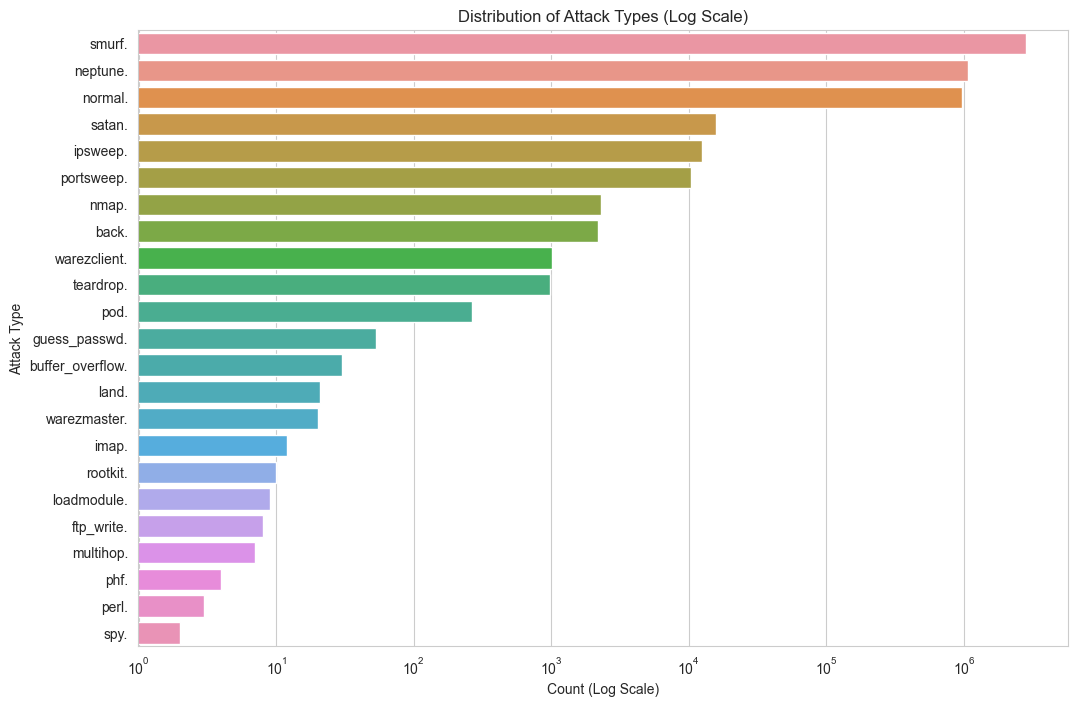

label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [18]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 8))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, log=True)  # Using log scale for the x-axis
plt.title('Distribution of Attack Types (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Attack Type')
plt.show();

# Get the count of each attack type
attack_counts = df['label'].value_counts()

# Print the counts
attack_counts

The visualization provides a clear representation of the distribution of different attack types in the dataset. At a glance, the following observations can be made:

1. **Dominant Attack Types**: The dataset is heavily dominated by three primary categories: `smurf`, `neptune`, and `normal`. These three alone constitute a significant majority of the dataset.
    - `smurf` attacks are the most prevalent, with a count of 2,807,886. This type of attack is a distributed denial-of-service attack in which large amounts of Internet Control Message Protocol (ICMP) ping traffic is sent to a target, overwhelming its resources.
    - `neptune` attacks come in second with 1,072,017 instances. This indicates another significant type of attack or activity that the network was subjected to.
    - `normal` represents benign or non-malicious traffic, and it's the third most common category with 972,781 instances. This is a good sign as it indicates that not all traffic is malicious, but the presence of such a high number of `normal` instances amidst malicious ones underscores the challenge of distinguishing between benign and malicious activities.

2. **Less Frequent Attack Types**: After the top three categories, there's a sharp drop in frequency. Attacks like `satan`, `ipsweep`, `portsweep`, and `nmap` range between 2,316 and 15,892 instances. These attacks are related to network probing or scanning activities where attackers are trying to identify vulnerabilities or gather information about the network.

3. **Rare Attack Types**: The least frequent attacks include `back`, `warezclient`, and `teardrop`, all of which have counts below 2,500. Despite their lower frequency, it's essential to detect and understand these attacks as they can have specific implications for network security.

4. **Logarithmic Scale Importance**: The use of a logarithmic scale in the visualization was crucial. Without it, the dominance of the `smurf`, `neptune`, and `normal` categories would overshadow the other attack types, making it challenging to discern the less frequent but equally important categories.

5. **Implications for Anomaly Detection**: The highly imbalanced nature of this dataset poses challenges for anomaly detection. Models trained on this data might be biased towards detecting the dominant classes and might struggle with the less frequent ones. Special techniques, such as oversampling, undersampling, or using synthetic data, might be required to address this imbalance during model training.

### 2. Basic Statistics

For numerical features, we'll compute and visualize basic statistics like mean, median, standard deviation, etc.

#### 2.1 Compute Basic Statistics:

In [19]:
# Compute basic statistics
stats = df.describe().transpose()

# Display the basic statistics
stats

,count,mean,std,min,25%,50%,75%,max
duration,4898431.0,4.834243e+01,723.329811,0.0,0.00,0.0,0.00,5.832900e+04
src_bytes,4898431.0,1.834621e+03,941431.074491,0.0,45.00,520.0,1032.00,1.379964e+09
dst_bytes,4898431.0,1.093623e+03,645012.333743,0.0,0.00,0.0,0.00,1.309937e+09
land,4898431.0,5.716116e-06,0.002391,0.0,0.00,0.0,0.00,1.000000e+00
wrong_fragment,4898431.0,6.487792e-04,0.042854,0.0,0.00,0.0,0.00,3.000000e+00
urgent,4898431.0,7.961733e-06,0.007215,0.0,0.00,0.0,0.00,1.400000e+01
hot,4898431.0,1.243766e-02,0.468978,0.0,0.00,0.0,0.00,7.700000e+01
num_failed_logins,4898431.0,3.205108e-05,0.007299,0.0,0.00,0.0,0.00,5.000000e+00
logged_in,4898431.0,1.435290e-01,0.350612,0.0,0.00,0.0,0.00,1.000000e+00
num_compromised,4898431.0,8.088304e-03,3.856481,0.0,0.00,0.0,0.00,7.479000e+03


#### 2.2 Visualize Basic Statistics

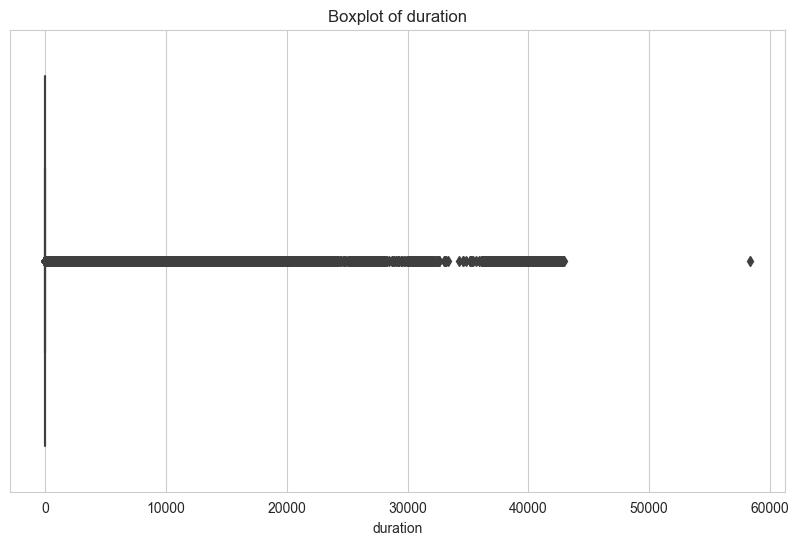

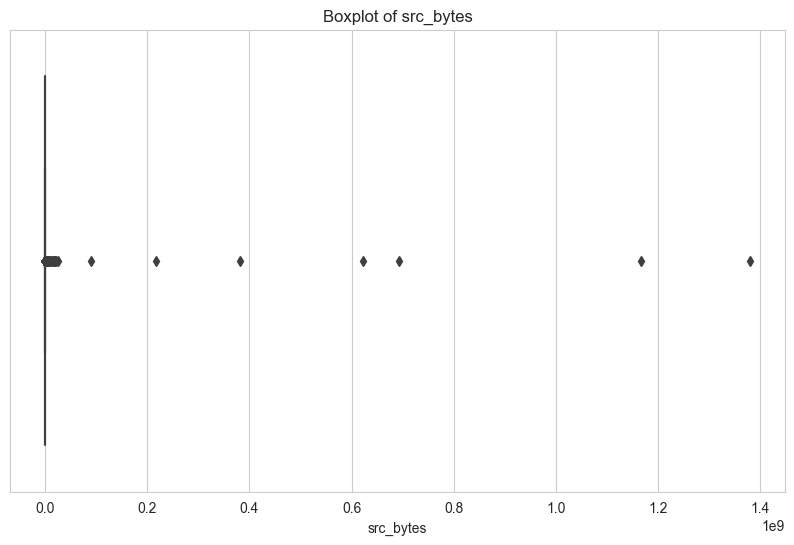

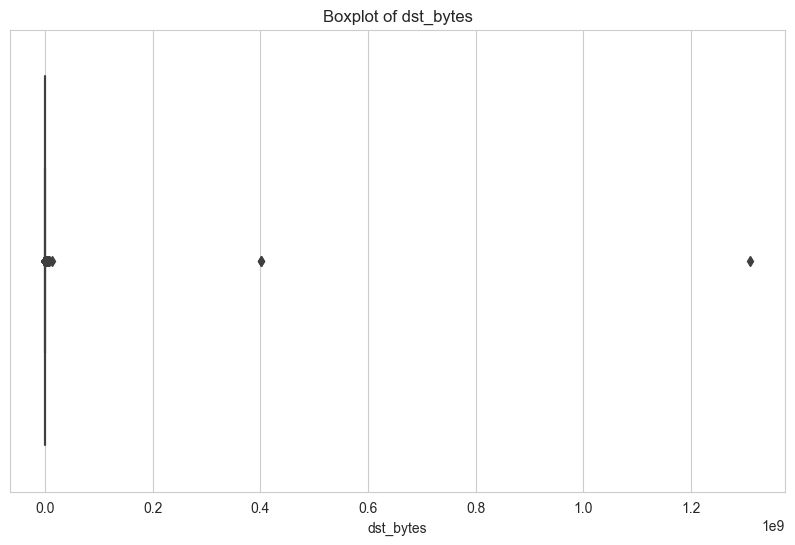

In [20]:
# Select a subset of numerical features for visualization (to avoid clutter)
selected_features = ['duration', 'src_bytes', 'dst_bytes']

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show();

### 3. Correlation Matrix

This will help you identify and visualize correlations between numerical features.

In [21]:
# Filter out only numerical columns:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_features]

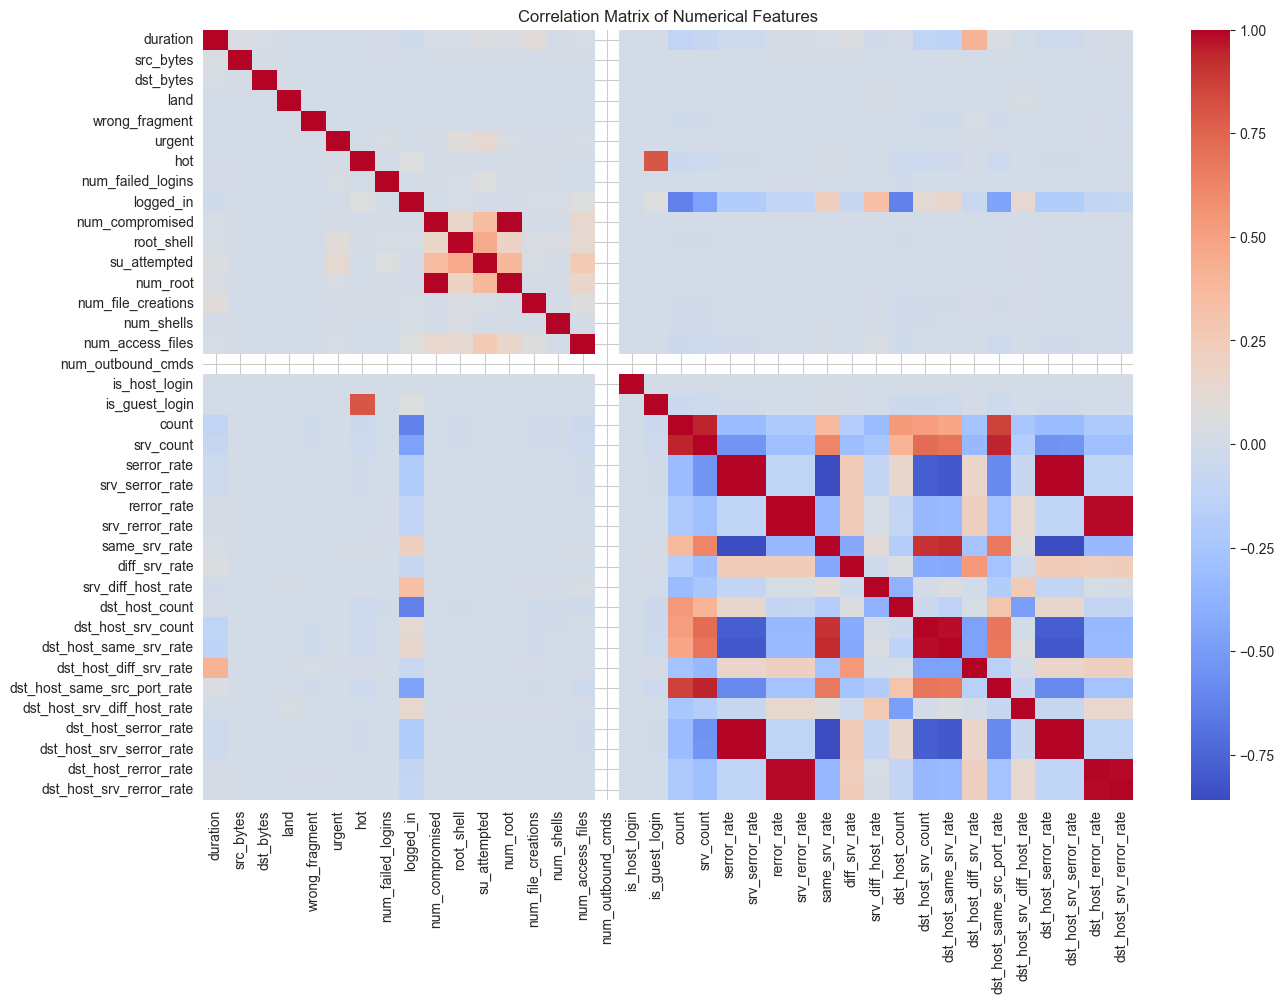

In [22]:
# Compute the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using OOP
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Correlation Matrix of Numerical Features')
plt.show()

### 4. Distribution of Protocol Types

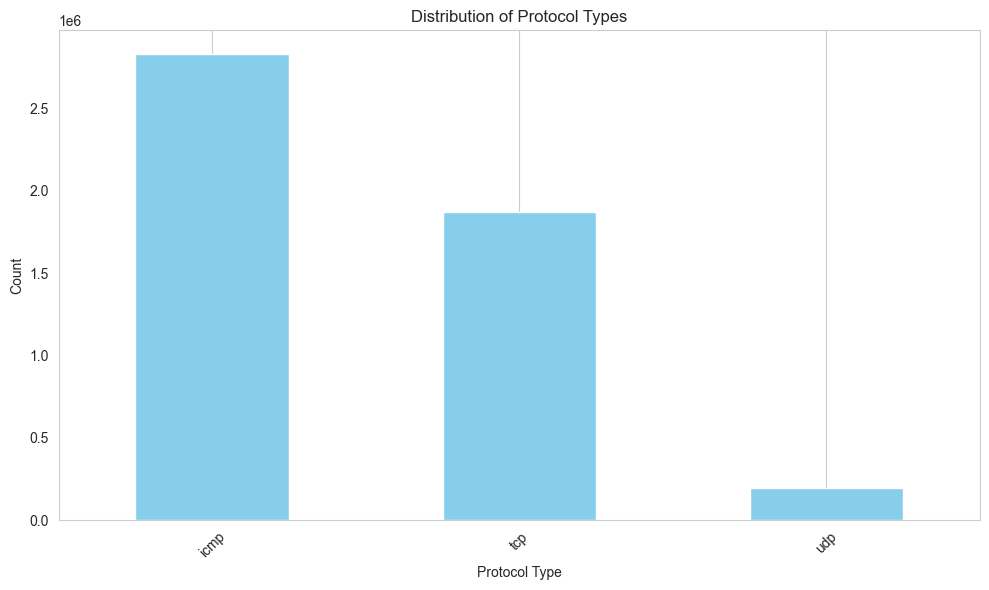

protocol_type
icmp    2833545
tcp     1870598
udp      194288
Name: count, dtype: int64


In [23]:
# Count the occurrences of each protocol type
protocol_counts = df['protocol_type'].value_counts()

# Visualize using OOP
fig, ax = plt.subplots(figsize=(10, 6))
protocol_counts.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Distribution of Protocol Types')
ax.set_xlabel('Protocol Type')
ax.set_ylabel('Count')
ax.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the counts in text format
print(df['protocol_type'].value_counts())

#### Distribution of Protocol Types:

- **ICMP (Internet Control Message Protocol):** With 2,833,545 occurrences, ICMP is the most prevalent protocol type in the dataset. ICMP is typically used by network devices, like routers, to send error messages and operational information. The high prevalence of ICMP might be due to the "smurf" attack, which is a type of ICMP-based attack. This aligns with our earlier observation where "smurf" was the most common attack type.

- **TCP (Transmission Control Protocol):** TCP comes in second with 1,870,598 occurrences. TCP is one of the main protocols in the Internet protocol suite and is used to send data reliably between two nodes. Given its widespread use in various internet services, it's expected to see a significant number of TCP connections in the dataset.

- **UDP (User Datagram Protocol):** UDP has 194,288 occurrences, making it the least prevalent among the three. UDP is used for tasks that require fast, efficient transmission, like games. UDP's stateless nature makes it suitable for servers that answer small queries from huge numbers of clients.

#### Interpretation:

1. The dominance of ICMP is notable and might be indicative of the specific types of network attacks or activities captured in this dataset, especially the "smurf" attack.
2. TCP's significant presence is expected given its widespread use in internet communications.
3. The relatively lower count of UDP might suggest that the network traffic captured had fewer services or applications that rely on UDP, or it might be less targeted for attacks in this dataset.

### 5. Distribution of Service Types

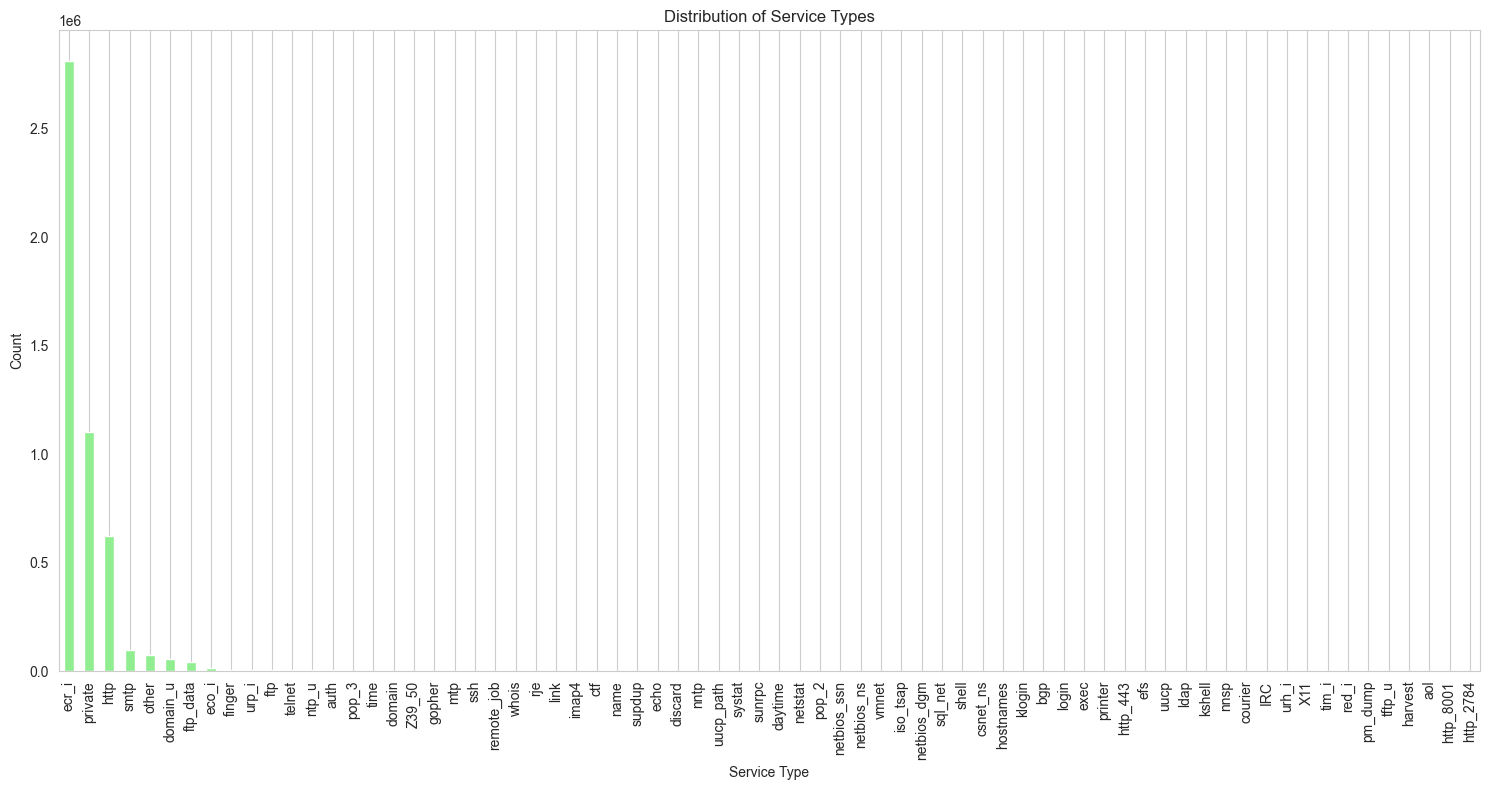

service
ecr_i        2811660
private      1100831
http          623091
smtp           96554
other          72653
              ...   
tftp_u             3
harvest            2
aol                2
http_8001          2
http_2784          1
Name: count, Length: 70, dtype: int64

In [24]:
# Count the occurrences of each service type
service_counts = df['service'].value_counts()

# Visualize using OOP
fig, ax = plt.subplots(figsize=(15, 8))
service_counts.plot(kind='bar', ax=ax, color='lightgreen')
ax.set_title('Distribution of Service Types')
ax.set_xlabel('Service Type')
ax.set_ylabel('Count')
ax.grid(axis='y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the counts in text format
df['service'].value_counts()

The dataset contains a wide variety of service types, which are indicative of the different kinds of network services that were monitored. Here's a breakdown of the most notable ones:

1. **ecr_i (2,811,660 occurrences):** This is the most prevalent service type in the dataset. The high count suggests that a significant portion of the network traffic (or attacks) was associated with this service.

2. **private (1,100,831 occurrences):** This is the second most common service type. The term "private" typically refers to private or reserved ports, which might be used for custom or proprietary services.

3. **http (623,091 occurrences):** HTTP is the foundation of data communication for the World Wide Web. Its significant presence is expected given the widespread use of web services.

4. **smtp (96,554 occurrences):** SMTP stands for Simple Mail Transfer Protocol, which is used for email transmission. Its presence indicates email-related traffic.

5. **other (72,653 occurrences):** This category likely captures traffic that doesn't neatly fit into the predefined service types.

6. **domain_u (57,782 occurrences):** This might refer to domain-related traffic, possibly DNS (Domain Name System) queries.

7. **ftp_data (40,697 occurrences):** FTP is the File Transfer Protocol, and this service type suggests data transfer activities related to FTP.

The remaining services have fewer occurrences, but they represent a diverse range of network activities, from authentication (`auth`) to file-related services (`ftp`, `efs`) to remote access (`telnet`, `ssh`) and many others.

#### Interpretation:

1. The dominance of `ecr_i` and `private` services suggests that a significant portion of the network traffic or anomalies were associated with these services. It would be worth investigating further what these services represent, especially `ecr_i`, given its high count.

2. The presence of `http` and `smtp` indicates regular web and email traffic, which are common in most networks.

3. The wide variety of services present in the dataset provides a comprehensive view of the network's activities. It's essential to understand the nature of each service, especially when analyzing anomalies or attacks associated with them.

4. Some services like `http_8001`, `http_2784`, `aol`, and `harvest` have very few occurrences. These might be indicative of rare or infrequent network activities, or they might be outliers that need further investigation.

###  Distribution of Flags

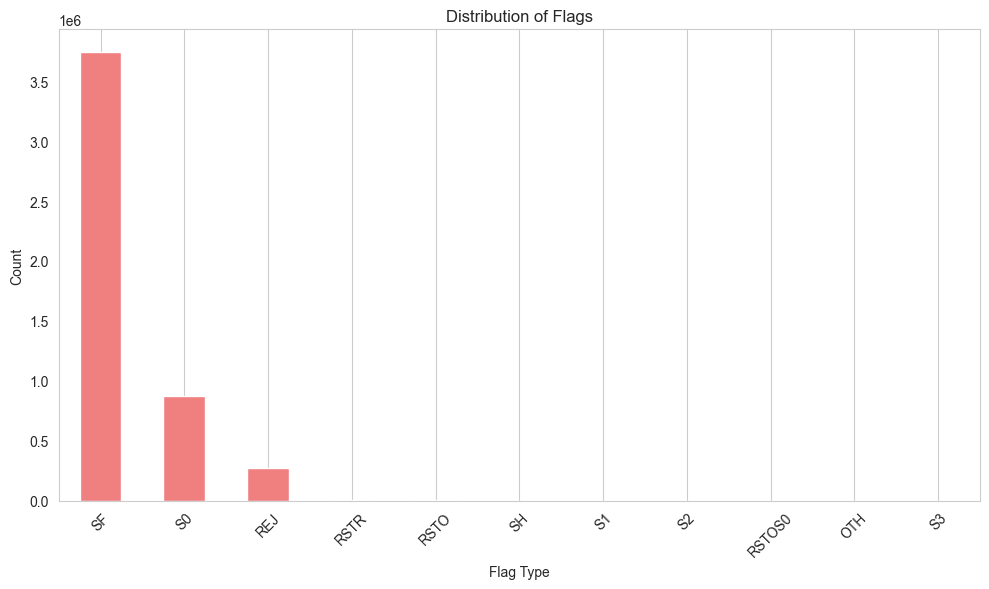

flag
SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: count, dtype: int64

In [25]:
# Count the occurrences of each flag type
flag_counts = df['flag'].value_counts()

# Visualize using OOP
fig, ax = plt.subplots(figsize=(10, 6))
flag_counts.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_title('Distribution of Flags')
ax.set_xlabel('Flag Type')
ax.set_ylabel('Count')
ax.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the counts in text format
df['flag'].value_counts()

Flags in network traffic data represent the state of the connection. Here's a breakdown of the flags you've provided:

1. **SF (3,744,328 occurrences):** This stands for "Normal Establish & Terminate". It's the most common flag and indicates that the connection was established and then terminated normally. This is the expected behavior for most connections.

2. **S0 (869,829 occurrences):** This flag indicates connection attempts where the connection was never established. It's often associated with SYN flooding attacks, where an attacker sends a large number of SYN packets (connection requests) but never completes the handshake to establish a connection.

3. **REJ (268,874 occurrences):** This flag indicates that the connection attempt was explicitly rejected. It could be due to various reasons, including firewall rules, non-responsive services, or other security mechanisms.

4. **RSTR (8,094 occurrences):** This flag indicates that the connection was reset. It's a way to abruptly terminate a connection.

5. **RSTO (5,344 occurrences):** This flag indicates that the connection was reset due to a timeout. It suggests that a connection was established, but no data was exchanged for a certain period, leading to a timeout.

6. **SH (1,040 occurrences):** This flag indicates a connection attempt where the handshake was completed, but the connection was then shut down without transferring any data.

7. **S1, S2, S3 (532, 161, and 50 occurrences respectively):** These flags represent different stages of connection establishment. Their low counts suggest that they are relatively rare in the dataset.

8. **RSTOS0 (122 occurrences):** This flag indicates a connection reset with the original SYN having a non-zero sequence number. It's a rare flag and might be indicative of specific types of network anomalies or behaviors.

9. **OTH (57 occurrences):** This flag represents "Other" conditions that don't fit into the standard flag categories.

#### Interpretation:

1. The dominance of the **SF** flag suggests that a significant portion of the network traffic was normal, with connections being established and terminated as expected.

2. The high count of the **S0** flag is noteworthy. It indicates a large number of unsuccessful connection attempts, which could be indicative of potential SYN flooding attacks or other anomalies.

3. Flags like **RSTR** and **RSTO** indicate connections that were terminated prematurely. While their counts are relatively low, they might be of interest when investigating specific types of network attacks or anomalies.

4. The presence of rare flags like **S1**, **S2**, **S3**, and **OTH** suggests specific, infrequent network behaviors. These might be worth investigating further to understand their significance in the context of the dataset.

## Feature Distributions

For this, we'll visualize the distribution of some key numerical features. Histograms or KDE (Kernel Density Estimation) plots are suitable for this.

#### a. Distribution of duration:

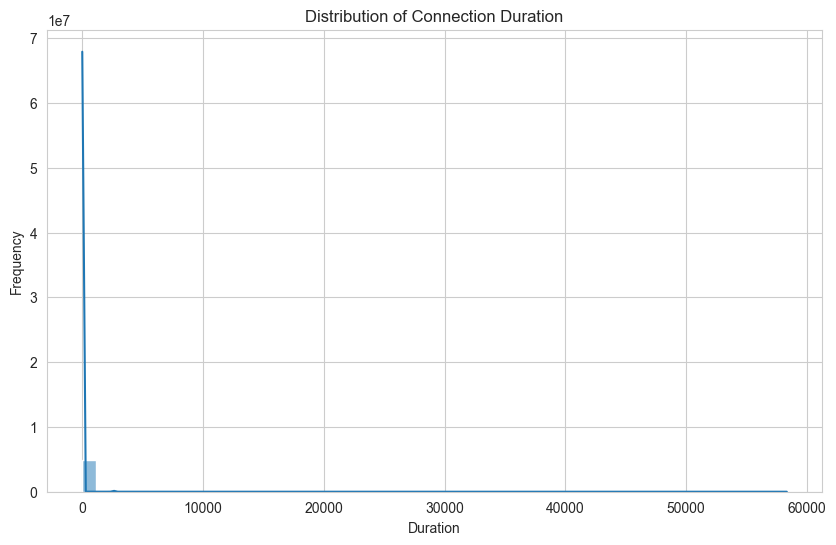

Statistics for Connection Duration:
 count    4.898431e+06
mean     4.834243e+01
std      7.233298e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.832900e+04
Name: duration, dtype: float64


In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True, bins=50)
plt.title('Distribution of Connection Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

duration_stats = df['duration'].describe()
print("Statistics for Connection Duration:\n", duration_stats)

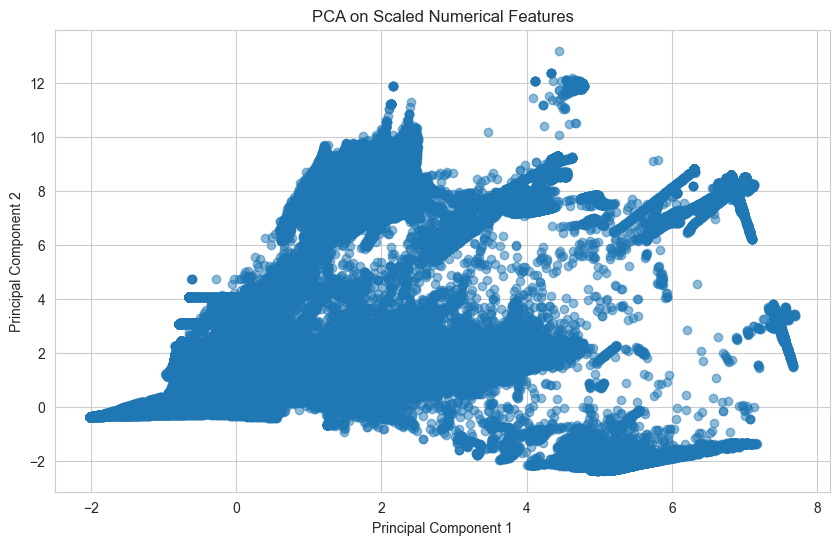

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numerical features and scaling them
numerical_features = df.select_dtypes(include=['float64', 'int64'])
scaled_features = StandardScaler().fit_transform(numerical_features)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Plotting the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Scaled Numerical Features')
plt.show()

In [30]:
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by Principal Component 1: {explained_variance[0]*100:.2f}%")
print(f"Variance explained by Principal Component 2: {explained_variance[1]*100:.2f}%")


Variance explained by Principal Component 1: 21.80%
Variance explained by Principal Component 2: 12.21%


Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original features into a new set of features, which are orthogonal (uncorrelated), and these new features are called the principal components.

From the results:

- **Principal Component 1 (PC1)** explains about **21.80%** of the total variance in the dataset.
- **Principal Component 2 (PC2)** explains about **12.21%** of the total variance.

Together, PC1 and PC2 account for approximately **34.01%** of the total variance. This means that by projecting the data onto these two components, we retain about 34.01% of the dataset's original information.
